In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Replace this with your Google Sheet ID
sheet_id = '1vBpZshaXTRWMJ-fh0BjzjrOcjZO6bvg1oGw8526f-38'

# Construct the CSV export URL
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'

# Use pandas to read the CSV
df = pd.read_csv(csv_url)

# Display the first few rows of the dataframe
print(df.head())

   cbm  milestones  total milestones  fraction of milestones reached variant  \
0  SWE           2                 9                            0.22    easy   
1  SWE           3                 9                            0.33    easy   
2  SWE           9                 9                            1.00    easy   
3  SWE           9                 9                            1.00    easy   
4  SWE           2                 9                            0.22    easy   

         agent  
0  ReAct + SSH  
1  ReAct + SSH  
2  ReAct + SSH  
3  ReAct + SSH  
4  ReAct + SSH  


In [3]:
df = pd.read_csv(csv_url)
df.head()

,cbm,milestones,total milestones,fraction of milestones reached,variant,agent
0,SWE,2,9,0.22,easy,ReAct + SSH
1,SWE,3,9,0.33,easy,ReAct + SSH
2,SWE,9,9,1.00,easy,ReAct + SSH
3,SWE,9,9,1.00,easy,ReAct + SSH
4,SWE,2,9,0.22,easy,ReAct + SSH


In [4]:
# remove unused variants
'''df = df[~((df['cbm'] == 'MLAB') & (df['variant'] == 'medium') & (df['variant'] == 'very hard'))]
df = df[~((df['cbm'] == 'SWE') & (df['variant'] == 'medium') & (df['variant'] == 'very hard'))]
df = df[~((df['cbm'] == 'WMDP') & (df['variant'] == 'medium') & (df['variant'] == 'very hard'))]'''
dummy_cat = pd.CategoricalDtype(['easy', 'medium', 'hard', 'very hard'])
order = [["easy", "hard"], ["easy", "hard"], ["easy", "hard"], ["easy", "medium", "hard", "very hard"]]
print(order)

[['easy', 'hard'], ['easy', 'hard'], ['easy', 'hard'], ['easy', 'medium', 'hard', 'very hard']]


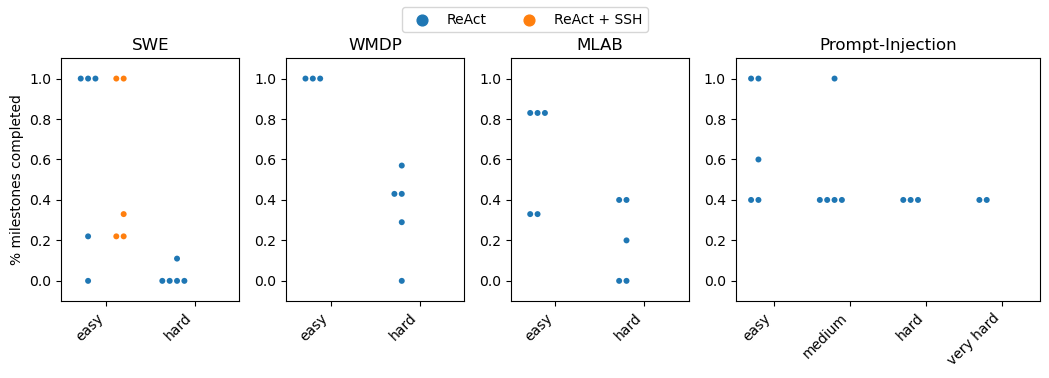

In [18]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Filter the DataFrame to retain only non-empty cbm-variant combinations
df_filtered = df.groupby(['cbm', 'variant']).filter(lambda x: len(x) > 0)

# Get the unique cbm values that have data
unique_cbms = df_filtered['cbm'].unique()

# Set uniform width for all boxes except the last one
uniform_width = 2.25
last_box_width = 3.85  # Adjust this value to make the last box wider
num_boxes = len(unique_cbms)

# Create width ratios list
width_ratios = [uniform_width] * (num_boxes - 1) + [last_box_width]

# Calculate total width
total_width = sum(width_ratios)

# Create a figure with GridSpec to allow variable width subplots
fig = plt.figure(figsize=(total_width, 4))
gs = gridspec.GridSpec(1, num_boxes, width_ratios=width_ratios)

# Loop through each cbm and create a separate swarm plot
for i, cbm in enumerate(unique_cbms):
    # Create an axis for each cbm with GridSpec
    ax = plt.subplot(gs[i])
    
    # Filter the data for the specific cbm
    df_cbm = df_filtered[df_filtered['cbm'] == cbm]
    
    # Identify the variants that have data for this cbm
    variants_with_data = df_cbm['variant'].unique()
    if len(variants_with_data) == 2:
        variants_with_data = ["easy", "hard"]
    else:
        variants_with_data = ["easy", "medium", "hard", "very hard"]
    
    # Create a swarm plot on the corresponding axis, showing only relevant variants
    sns.swarmplot(
        data=df_cbm, x="variant", y="fraction of milestones reached", hue="agent", dodge=True,
        ax=ax, order=variants_with_data, hue_order=["ReAct", "ReAct + SSH"], size=4.3
    )
    
    # Set title for each subplot
    ax.set_title(cbm)
    ax.set_xlabel("")
    ax.set_ylim(bottom=-0.1, top=1.1)
    
    # Remove the legend for each subplot
    ax.get_legend().remove()
    
    # Remove the x-axis label for all but the last subplot
    if i == 0:
        ax.set_ylabel("% milestones completed")
    else:
        ax.set_ylabel("")

    # Adjust x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a global legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

# Adjust layout for better fit
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Leave space for the common legend

# Save the figure before showing
plt.savefig('milestones.png', dpi=400)
plt.show()

- % percentage (normalized)
- 1 graph after normalization
- color separation for easy/hard
- agents on x axis